##### Makemore is an autoregressive character model with a wide
##### choice of models from bigrams all the way to a tf as seen in gpt.
##### We can feed it a database of names and it will learn to generate 
##### name ideas that sound like but are not in the database.

In [2]:
#get a list of strings in a python list called words
words = open('names.txt', 'r').read().splitlines()

In [3]:
#let's look at the first 10 words
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

##### Descriptive Statistics section

In [4]:
# let's check the length of the list
len(words)

32033

In [5]:
# look at the shortest and longest words
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

#### We are going to look at the bigram model first where we are only looking at two characters in a word

In [6]:
b = {} # create an empty dictionary to keep counts of bigrams
for w in words:
    #wrap the words with <s> and <e>
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 # this is a nice way to increment a count in a dictionary, get the value of the key, if it doesn't exist, return 0, and add 1 to it

In [7]:
b.items() #this returns a list of tuples, each tuple is a key value pair

dict_items([(('<S>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<E>'), 6640), (('<S>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<S>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<S>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<S>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<S>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<E>'), 3983), (('<S>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<S>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<E>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [8]:
#sort the list of tuples by the second element of the tuple, the count
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [9]:
# We are going to store this information in a 2D array and use pytorch to do the math for us
import torch

In [10]:
a = torch.zeros(3,5,dtype=torch.int32)
a

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]], dtype=torch.int32)

In [11]:
a.dtype

torch.int32

In [12]:
N = torch.zeros((28,28), dtype=torch.int32)

In [13]:
# create a set of all the characters in the words
set(''.join(words)) # this is a set, a collection of unique elements
len(set(''.join(words)))

26

In [14]:
# we don't want a sorted set (for a to z), we want a list, so we can index it
chars = sorted(list(set(''.join(words))))

In [15]:
chars

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [16]:
stoi = {s:i for i,s in enumerate(chars)} # this is a dictionary that maps characters to indices

In [17]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25}

In [18]:
# uncomment this to add the start and end characters to the dictionary if you want to use them
# stoi['<S>'] = 26 # add the start and end characters to the dictionary
# stoi['<E>'] = 27
# for w in words:
#     #wrap the words with <s> and <e>
#     chs = ['<S>'] + list(w) + ['<E>']
#     for ch1, ch2 in zip(chs, chs[1:]):
#         ix1 = stoi[ch1] # get the index of the first character
#         ix2 = stoi[ch2] # get the index of the second character
#         N[ix1, ix2] += 1 # increment the count in the matrix


In [19]:
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

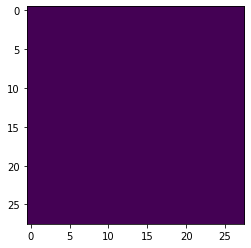

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import numpy
%matplotlib inline
plt.imshow(N)

In [21]:
# itos = {i:s for s,i in stoi.items()} # this is a dictionary that maps indices to characters
# itos

In [22]:
# visualization for the matrix
# plt.figure(figsize=(16,16))

# plt.imshow(N, cmap='Blues') # use the blue color map
# for i in range(28):
#     for j in range(28):
#         chstr = itos[i] + itos[j] # get the bigram from the dictionary
#         plt.text(j, i, chstr, ha='center', va='bottom', color='gray') # plot the bigram text on the matrix
#         plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray') # plot the count on the matrix, used item() to get the value from the tensor instead of the tensor itself
# plt.axis('off')


In [23]:
# As you can see that above viz is not very clear, so we will use a better viz for start and end characters

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)} # +1 to make room for the start and end characters
stoi['.'] = 0 # add the start and end characters to the dictionary
itos = {i:s for s,i in stoi.items()} # this is a dictionary that maps indices to characters

In [24]:
for w in words:
    #wrap the words with . and .
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # get the index of the first character
        ix2 = stoi[ch2] # get the index of the second character
        N[ix1, ix2] += 1 # increment the count in the matrix

(-0.5, 27.5, 27.5, -0.5)

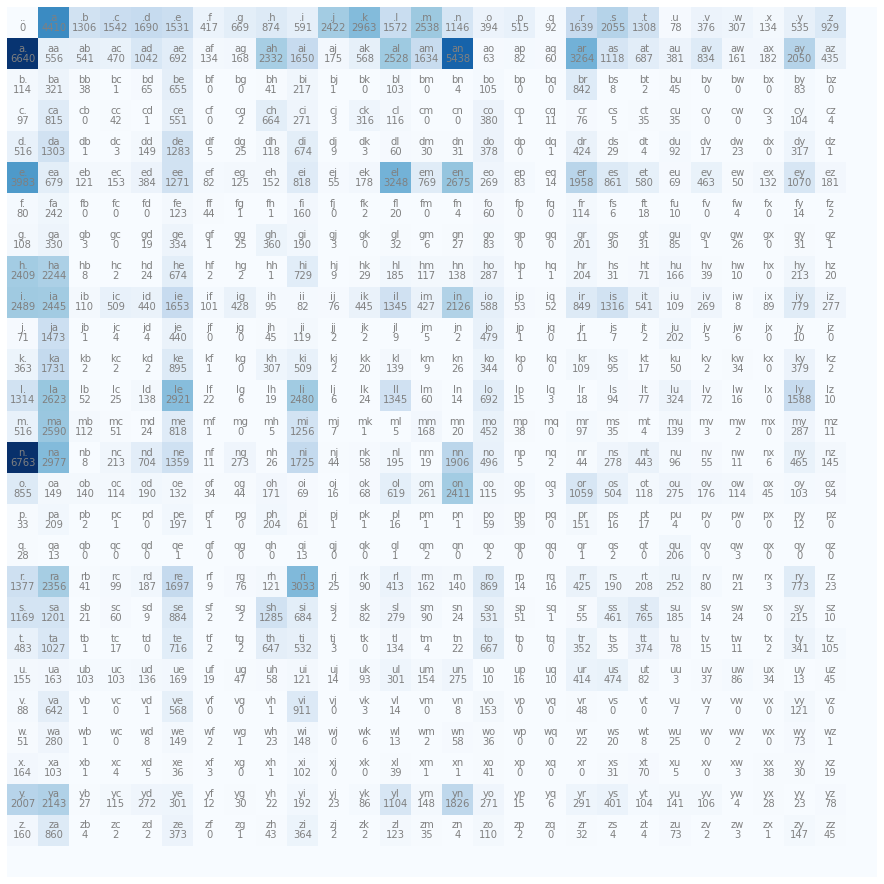

In [25]:
# better visualization for the matrix
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues') # use the blue color map
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j] # get the bigram from the dictionary
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray') # plot the bigram text on the matrix
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray') # plot the count on the matrix, used item() to get the value from the tensor instead of the tensor itself
plt.axis('off')

In [26]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929,    0], dtype=torch.int32)

In [27]:
# create a probability matrix [*section 1]
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [28]:
# we're going to use the multinomial distribution to sample from the probability distribution
# in other words, you give me probabilities, and I will give you integers which are sampled from the distribution

g = torch.Generator().manual_seed(2147483647) # this is a random number generator, we are going to use it to make sure we get the same results every time
p = torch.rand(3, generator=g) # this is a random vector of length 3
p /= p.sum() # this is a probability distribution

In [29]:
p

tensor([0.6064, 0.3033, 0.0903])

In [30]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g) # this will sample 20 times from the distribution

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [31]:
g = torch.Generator().manual_seed(2147483647) # this is a random number generator, we are going to use it to make sure we get the same results every time
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # this will sample 1 time from the distribution [*run this only after running section 1]
ix

1

In [32]:
#check the character being sampled
itos[ix]

'a'

In [33]:
g = torch.Generator().manual_seed(2147483647) # this is a random number generator, we are going to use it to make sure we get the same results every time
for i in range(30):
    ix = 0 # start with the index of the start character
    out = [] # this is the output list
    while(True): 
        p = N[ix].float() # get the row of the matrix
        p = p / p.sum() # convert it to a probability distribution      
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the distribution
        if ix == 0: # if the index is the index of the end character,
            break # break out of the loop
        out.append(itos[ix]) # otherwise, append the character to the output list
    print(''.join(out)) # print the output   

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin
torrederahnn
ellovyllobrpin
a
wai
kn
jaieendenelele
kianu
eryly
zeeieil
kayvirgiynenn


In [34]:
p.shape

torch.Size([28])

In [35]:
P = N.float() # convert the matrix to float
P = P / P.sum(dim=1, keepdim=True) # convert the matrix to a probability distribution, keepdim=True means that the dimension is kept, so the output is a 2D matrix


In [36]:
P[0].sum()

tensor(1.)

In [37]:
g = torch.Generator().manual_seed(2147483647) # this is a random number generator, we are going to use it to make sure we get the same results every time

for i in range(30):
    ix = 0 # start with the index of the start character
    out = [] # this is the output list
    while(True): 
        p = P[ix] # get the row of the matrix    
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item() # sample from the distribution
        if ix == 0: # if the index is the index of the end character,
            break # break out of the loop
        out.append(itos[ix]) # otherwise, append the character to the output list
    print(''.join(out)) # print the output   

mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin
torrederahnn
ellovyllobrpin
a
wai
kn
jaieendenelele
kianu
eryly
zeeieil
kayvirgiynenn


In [38]:
# if you have't gone through broadcasting semantics, you can read about it here: https://pytorch.org/docs/stable/notes/broadcasting.html
# without reading it, you can still understand the code, but it will be a bit harder



In [39]:
#let's see the probability of the first 3 characters in the first 3 words
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        print(f'{ch1} -> {ch2} : {prob:.4f}')

. -> e : 0.0478
e -> m : 0.0377
m -> m : 0.0253
m -> a : 0.3899
a -> . : 0.1960
. -> o : 0.0123
o -> l : 0.0780
l -> i : 0.1777
i -> v : 0.0152
v -> i : 0.3541
i -> a : 0.1381
a -> . : 0.1960
. -> a : 0.1377
a -> v : 0.0246
v -> a : 0.2495
a -> . : 0.1960


In [40]:
# any prob greater than 0.5 is a good candidate for the next character
# for really good models, you can get probs greater than 0.9
# so let's summarize quality of the model using max likelihood estimation
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        print(f'{ch1} -> {ch2} : {prob:.4f} : {logprob:.4f}')

. -> e : 0.0478 : -3.0408
e -> m : 0.0377 : -3.2793
m -> m : 0.0253 : -3.6772
m -> a : 0.3899 : -0.9418
a -> . : 0.1960 : -1.6299
. -> o : 0.0123 : -4.3982
o -> l : 0.0780 : -2.5508
l -> i : 0.1777 : -1.7278
i -> v : 0.0152 : -4.1867
v -> i : 0.3541 : -1.0383
i -> a : 0.1381 : -1.9796
a -> . : 0.1960 : -1.6299
. -> a : 0.1377 : -1.9829
a -> v : 0.0246 : -3.7045
v -> a : 0.2495 : -1.3882
a -> . : 0.1960 : -1.6299


In [41]:
# as you can see good model's log likelihood closes near to 0 
# while bad model's log likelihood is very far from 0 to -infinity
log_likelihood = 0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        #print(f'{ch1} -> {ch2} : {prob:.4f} : {logprob:.4f}')

print(f'log likelihood: {log_likelihood:.4f}')
nll = -log_likelihood
print(f'negative log likelihood: {nll:.4f}')
print(f'Average : {nll/n:.4f}')

log likelihood: -559891.7500
negative log likelihood: 559891.7500
Average : 2.4541


In [42]:
#Goal: maximize the likelihood of the data w.r.t the model parameters , also referred to as statistical modeling
# equivalent to maximimizing the log likelihood because the log is monotonic
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

#you can use this for evaluating any word
log_likelihood = 0
n = 0
for w in ["kushant"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1} -> {ch2} : {prob:.4f} : {logprob:.4f}')

print(f'log likelihood: {log_likelihood:.4f}')
nll = -log_likelihood
print(f'negative log likelihood: {nll:.4f}')
print(f'Average : {nll/n:.4f}')

. -> k : 0.0925 : -2.3806
k -> u : 0.0099 : -4.6131
u -> s : 0.1512 : -1.8892
s -> h : 0.1585 : -1.8418
h -> a : 0.2946 : -1.2220
a -> n : 0.1605 : -1.8296
n -> t : 0.0242 : -3.7226
t -> . : 0.0867 : -2.4451
log likelihood: -19.9440
negative log likelihood: 19.9440
Average : 2.4930


##### Neural network part

In [43]:
#create a training set for all the bigrams
xs , ys = [], [] # xs is the input, ys is the label
for w in words[:1]:
    #wrap the words with . and .
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1] # get the index of the first character
        ix2 = stoi[ch2] # get the index of the second character
        print(f'{ch1} -> {ch2} : {ix1} -> {ix2}')
        xs.append(ix1) # append the index of the first character to the input list
        ys.append(ix2) # append the index of the second character to the label list

xs = torch.tensor(xs) # convert the input list to a tensor
ys = torch.tensor(ys) # convert the label list to a tensor

# *note here that you can use torch.tensor and torch.Tensor, they are the same thing
# the only difference is thata torch.tensor infers the type automatically, while torch.Tensor returns
# a torch.FloatTensor by default, so recommend using torch.tensor which also has a dtype argument to specify the type


. -> e : 0 -> 5
e -> m : 5 -> 13
m -> m : 13 -> 13
m -> a : 13 -> 1
a -> . : 1 -> 0


In [44]:
xs

tensor([ 0,  5, 13, 13,  1])

In [45]:
ys

tensor([ 5, 13, 13,  1,  0])

In [46]:
import torch.nn.functional as F # this is the functional interface to the torch.nn module
xenc = F.one_hot(xs, num_classes=27).float() # this is the one hot encoding of the input

# *note here that you can't dtype as you normally would in case of other torch modules
# if you check the xenc dtype, you'll notice that the dtype is int32 by default
# hence the casting to float is necessary

In [47]:
xenc.shape

torch.Size([5, 27])

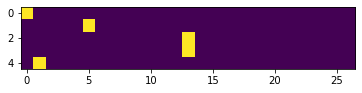

In [48]:
plt.imshow(xenc) # plot the one hot encoding

In [49]:
xenc.dtype 

torch.float32

In [50]:
W = torch.randn((27, 27)) # randn is a function that returns a tensor with random values from a normal distribution with mean 0 and variance 1
xenc @ W # this is the dot product of the one hot encoding and the weight matrix , @ is the matrix multiplication operator in pytorch


tensor([[ 0.7557, -1.0353,  1.0870, -0.7117, -0.7604, -0.6674,  0.6622,  0.1631,
         -0.4260,  0.8360,  0.5041, -0.6086,  1.2047, -1.4158, -0.6016,  0.5725,
         -1.2232,  0.0298,  0.5908,  0.7271,  0.3803,  0.8133, -1.6921, -0.2977,
         -1.4700, -0.7681, -0.2373],
        [ 0.7501,  1.0819,  1.4124,  0.6143,  0.5321,  0.5613,  1.4715,  0.8546,
          1.7662,  0.3212,  0.3674,  0.8235,  0.4057,  1.0604,  0.2884, -1.1732,
          1.0081, -0.4089,  0.7002,  0.4270,  1.0822, -1.4464,  0.7972, -1.8353,
          1.4822,  0.6751,  2.1263],
        [ 1.4026,  0.7940,  0.2741, -0.2788,  0.5824,  0.4565, -1.4754, -0.2013,
         -0.0886, -0.6298, -1.1385, -0.6022, -2.6705,  0.0286,  2.9169,  1.4313,
         -0.3528,  0.4526,  0.4448,  0.0362,  1.1481, -1.3661, -0.9769,  1.1281,
          0.3398,  0.2998,  0.2373],
        [ 1.4026,  0.7940,  0.2741, -0.2788,  0.5824,  0.4565, -1.4754, -0.2013,
         -0.0886, -0.6298, -1.1385, -0.6022, -2.6705,  0.0286,  2.9169,  1.4313

In [51]:
(xenc @ W).shape # the output shape is (n, 27) where n is the number of characters in the word

torch.Size([5, 27])

In [52]:
(xenc @ W).exp() # this is the exponentiation of the output of the dot product

tensor([[ 2.1290,  0.3551,  2.9652,  0.4908,  0.4675,  0.5130,  1.9390,  1.1772,
          0.6531,  2.3071,  1.6556,  0.5441,  3.3357,  0.2427,  0.5479,  1.7727,
          0.2943,  1.0303,  1.8055,  2.0690,  1.4627,  2.2553,  0.1841,  0.7425,
          0.2299,  0.4639,  0.7887],
        [ 2.1172,  2.9504,  4.1059,  1.8483,  1.7025,  1.7529,  4.3556,  2.3505,
          5.8485,  1.3788,  1.4440,  2.2786,  1.5003,  2.8877,  1.3343,  0.3094,
          2.7403,  0.6644,  2.0142,  1.5327,  2.9510,  0.2354,  2.2192,  0.1596,
          4.4026,  1.9643,  8.3840],
        [ 4.0656,  2.2122,  1.3153,  0.7567,  1.7904,  1.5785,  0.2287,  0.8176,
          0.9153,  0.5327,  0.3203,  0.5476,  0.0692,  1.0290, 18.4832,  4.1842,
          0.7028,  1.5724,  1.5602,  1.0368,  3.1521,  0.2551,  0.3765,  3.0898,
          1.4046,  1.3495,  1.2679],
        [ 4.0656,  2.2122,  1.3153,  0.7567,  1.7904,  1.5785,  0.2287,  0.8176,
          0.9153,  0.5327,  0.3203,  0.5476,  0.0692,  1.0290, 18.4832,  4.1842

In [53]:
logits = xenc @ W
counts = logits.exp() # equivalent to N matrix
probs = counts / counts.sum(dim=1, keepdim=True) # equivalent to P matrix
probs

tensor([[0.0657, 0.0110, 0.0915, 0.0151, 0.0144, 0.0158, 0.0598, 0.0363, 0.0201,
         0.0712, 0.0511, 0.0168, 0.1029, 0.0075, 0.0169, 0.0547, 0.0091, 0.0318,
         0.0557, 0.0638, 0.0451, 0.0696, 0.0057, 0.0229, 0.0071, 0.0143, 0.0243],
        [0.0324, 0.0451, 0.0627, 0.0282, 0.0260, 0.0268, 0.0666, 0.0359, 0.0894,
         0.0211, 0.0221, 0.0348, 0.0229, 0.0441, 0.0204, 0.0047, 0.0419, 0.0102,
         0.0308, 0.0234, 0.0451, 0.0036, 0.0339, 0.0024, 0.0673, 0.0300, 0.1281],
        [0.0744, 0.0405, 0.0241, 0.0139, 0.0328, 0.0289, 0.0042, 0.0150, 0.0168,
         0.0098, 0.0059, 0.0100, 0.0013, 0.0188, 0.3384, 0.0766, 0.0129, 0.0288,
         0.0286, 0.0190, 0.0577, 0.0047, 0.0069, 0.0566, 0.0257, 0.0247, 0.0232],
        [0.0744, 0.0405, 0.0241, 0.0139, 0.0328, 0.0289, 0.0042, 0.0150, 0.0168,
         0.0098, 0.0059, 0.0100, 0.0013, 0.0188, 0.3384, 0.0766, 0.0129, 0.0288,
         0.0286, 0.0190, 0.0577, 0.0047, 0.0069, 0.0566, 0.0257, 0.0247, 0.0232],
        [0.0239, 0.0105,

In [54]:
probs[0].sum() # this is the probability of the first character in the first word

tensor(1.)

In [55]:
probs.shape

torch.Size([5, 27])

In [56]:
# let's organize it a bit
# randomly initialize the weight matrix. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647) #try adding 1 to the seed and see what happens (Smoothing the model, so your average negative log likelihood is higher)
W = torch.randn((27, 27), generator=g) # randn is a function that returns a tensor with random values from a normal distribution with mean 0 and variance 1

In [57]:
xenc = F.one_hot(xs, num_classes=27).float() # this is the one hot encoding of the input
logits = xenc @ W # predict the log counts
counts = logits.exp() # counts, equivalent to N matrix
probs = counts / counts.sum(dim=1, keepdim=True) # probs for the next character
# *note the last two combined lines are referred to as the softmax function

In [58]:
probs.shape

torch.Size([5, 27])

In [59]:
nlls = torch.zeros(5)
for i in range(5):
    #i-th bigram
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('-------------------')
    print(f'bigram example: {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:',x)
    print('output probabilities from the neural nets:',probs[i])
    print('label (actual next character):',y)
    p = probs[i,y] # probability of the label
    print('Probability assigned by the nets to the correct label:',p.item())
    logp = torch.log(p) # log probability of the label
    print('log likelihood of the label:',logp.item())
    nll = -logp # negative log likelihood of the label
    print('negative log likelihood of the label:',nll.item())
    nlls[i] = nll
    print("=======================================")
    print("Average negative log likelihood:",nlls.mean().item())


-------------------
bigram example: 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural nets: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
Probability assigned by the nets to the correct label: 0.01228625513613224
log likelihood of the label: -4.399273872375488
negative log likelihood of the label: 4.399273872375488
Average negative log likelihood: 0.8798547983169556
-------------------
bigram example: 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural nets: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
l

##### Let's work on the optimization (similar to the micrograd from tut1)

In [60]:
xs

tensor([ 0,  5, 13, 13,  1])

In [61]:
ys

tensor([ 5, 13, 13,  1,  0])

In [62]:
# randomly initialize the weight matrix. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647) 
W = torch.randn((27, 27), generator=g,requires_grad=True) # randn is a function that returns a tensor with random values from a normal distribution with mean 0 and variance 1


In [63]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # this is the one hot encoding of the input
logits = xenc @ W # predict the log counts
counts = logits.exp() # counts, equivalent to N matrix
probs = counts / counts.sum(dim=1, keepdim=True) # probs for the next character

In [64]:
probs.shape

torch.Size([5, 27])

In [65]:
loss = -probs[torch.arange(5), ys].log().mean() # this is the average negative log likelihood

In [66]:
print(loss.item())

3.7693049907684326


In [67]:
### backward pass
W.grad = None # clear the gradient (if any), preferably use None instead of 0
loss.backward() # compute the gradient


In [68]:
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [69]:
W.shape

torch.Size([27, 27])

In [70]:
W.grad.shape

torch.Size([27, 27])

In [71]:
### update the weights
W.data +=  -0.1 * W.grad # update the weights by subtracting the gradient multiplied by the learning rate

In [72]:
print(loss.item())

3.7693049907684326


In [75]:
#### Let's put it all together

#create the dataset
xs , ys = [], [] # xs is the input, ys is the label
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement() # number of elements in the tensor
print("Number of elements in the tensor:",num)

#initialize the "network"
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g,requires_grad=True)

Number of elements in the tensor: 228146


3.758953809738159
3.371100902557373
3.154043197631836
3.020373821258545
2.927711248397827
2.8604023456573486
2.8097293376922607
2.7701022624969482
2.7380728721618652
2.711496591567993
2.6890032291412354
2.6696882247924805
2.6529300212860107
2.638277292251587
2.6253881454467773
2.6139907836914062
2.60386323928833
2.5948219299316406
2.5867116451263428
2.579403877258301
2.572789192199707
2.5667762756347656
2.5612878799438477
2.5562586784362793
2.551633596420288
2.547365665435791
2.543415069580078
2.5397486686706543
2.5363364219665527
2.533154249191284
2.5301806926727295
2.5273966789245605
2.5247862339019775
2.522334575653076
2.520029067993164
2.517857789993286
2.515810489654541
2.513878345489502
2.512052059173584
2.5103237628936768
2.5086867809295654
2.5071346759796143
2.5056614875793457
2.5042612552642822
2.5029289722442627
2.5016608238220215
2.5004522800445557
2.4992988109588623
2.498197317123413
2.497144937515259
2.4961376190185547
2.495173692703247
2.4942493438720703
2.493363380432129

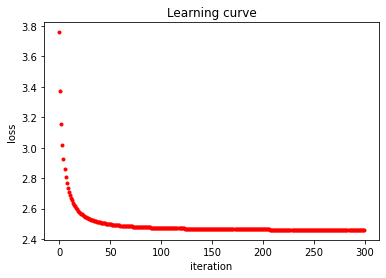

In [76]:
# gradient descent for 200 iterations
for k in range(300):

    #forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network
    logits = xenc @ W # predict the log counts
    counts = logits.exp() # counts, equivalent to N matrix
    probs = counts / counts.sum(dim=1, keepdim=True) # probs for the next character
    loss = -probs[torch.arange(num), ys].log().mean() # this is the average negative log likelihood
    #loss = -probs[torch.arange(num), ys].log().mean() + 0.1 * W.abs().sum() # adding a regularization term to the loss function
    print(loss.item())

    #backward pass
    W.grad = None # clear the gradient (if any), preferably use None instead of 0
    loss.backward() # compute the gradient

    #update the weights
    W.data +=  -50 * W.grad # update the weights by subtracting the gradient multiplied by the learning rate


    #plot the learning curve during training
    plt.plot(k,loss.item(),'r.')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.title('Learning curve')